In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hist.png" style="zoom:100%;" />

## 讀取資料

In [175]:
""" Your code here: 讀取 titanic.csv """
train = pd.read_csv('./titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [176]:
""" Your code here: """
train.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'],inplace=True)

In [177]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [178]:
#檢查缺失值
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [179]:
# 缺失比例
missing = train.isnull().sum()
missing = missing[missing>0]
discrete = [f for f in train.columns if train[f].dtypes =='object']

for i, feature in enumerate(missing.index):
    val = missing[feature]
    
    if feature in discrete:
        print(f'{feature} is discrete, {val/train.shape[0] :2%}')
    else:
        print(f'{feature} is continues, {val/train.shape[0] :2%}')

Age is continues, 19.865320%
Embarked is discrete, 0.224467%


## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

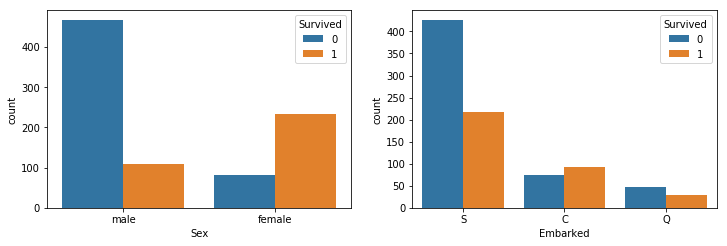

In [180]:
""" Your code here: """
survived = train['Survived']
#discrete
discrete = [f for f in train.columns if train[f].dtypes =='object']
plt.figure(figsize=(12,8))
for i, feature in enumerate(discrete):
    plt.subplot(2,2,i+1)
    sns.countplot(x=train[feature], hue =survived)
plt.show()

In [181]:
#填補 Embarked 缺失值為"S", 因為"S"為眾數
train_fe = train.copy()
train_fe['Embarked'] = train_fe['Embarked'].fillna('S')

C:\Users\HAO\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


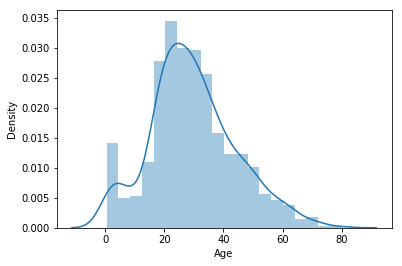

In [182]:
#age
sns.distplot(train['Age'])
plt.show()

In [183]:
#填補age 的缺失值為 mean
age_mean = train['Age'].mean()
train_fe['Age']=train_fe['Age'].fillna(age_mean)

In [184]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [185]:
""" Your code here: """
#label encoding
le = LabelEncoder()
train_fe['Sex'] = le.fit_transform(train['Sex'])
train_fe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [186]:
#one-hot encoding
OneHot_Sex = pd.get_dummies(train['Embarked'], prefix='Embarked')
train_fe = pd.concat([train_fe, OneHot_Sex], axis=1)
train_fe.drop('Embarked', axis=1, inplace=True)
train_fe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


## 切分訓練集及測試集

In [135]:
""" Your code here: """
# 切分 0.25為測試集
x = train_fe.drop('Survived', axis=1)
y = train_fe['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state =0)

## Training

In [136]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

C:\Users\HAO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluation

In [137]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       410
           1       0.99      0.94      0.96       258

   micro avg       0.97      0.97      0.97       668
   macro avg       0.98      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668


Testing report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.77      0.68      0.72        84

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



## 自我嘗試

In [187]:
# 嘗試將 Fare分成四分位距
Fare_label = pd.qcut(train['Fare'],4, labels=False)
Fare_label = pd.DataFrame({'Fare_label':Fare_label})
train_fe_1 = pd.concat([train_fe, Fare_label], axis=1)
train_fe_1.drop('Fare', axis=1,inplace=True)
train_fe_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Fare_label
0,0,3,1,22.0,1,0,0,0,1,0
1,1,1,0,38.0,1,0,1,0,0,3
2,1,3,0,26.0,0,0,0,0,1,1
3,1,1,0,35.0,1,0,0,0,1,3
4,0,3,1,35.0,0,0,0,0,1,1


In [188]:
""" Your code here: """
# 切分 0.25為測試集
x = train_fe_1.drop('Survived', axis=1)
y = train_fe_1['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state =0)

#trainig
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

# Evaluation
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       410
           1       0.96      0.91      0.93       258

   micro avg       0.95      0.95      0.95       668
   macro avg       0.95      0.94      0.95       668
weighted avg       0.95      0.95      0.95       668


Testing report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       139
           1       0.79      0.70      0.74        84

   micro avg       0.82      0.82      0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223



C:\Users\HAO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
